In [1]:
from from_coords import *

In [2]:
config_path = 'weights/inria_config.json'
model_weight_path = 'weights/inria_weights.pth'
bounding_box = [[46.517912578729074, 6.560691102288617], [46.5161576863163, 6.563115234250399]]
parcel_polygon = [[46.51656344681835, 6.560728158801604], [46.517934700120776, 6.561210771709841], \
            [46.5179253876136, 6.5622765043554905], [46.51794845035286, 6.563045957013022], \
                  [46.51681718786281, 6.562760313143832], [46.51634223819382, 6.561474667412574]]
mapbox_api_key = 'pk.eyJ1Ijoic3RhbmR1YyIsImEiOiJja21vbXdrOXUwNmE0MnFvOXVuanowMGl0In0.gvmSBOYLGavx8nhgAYTO5Q'
import timeit
starttime = timeit.default_timer()
image, buildings, dists, nb_comp, parcelle_coords_xy = segment_buildings(config_path, model_weight_path, \
                                                                 bounding_box, mapbox_api_key, parcel_polygon)
print("The time difference is :", timeit.default_timer() - starttime)

/home/stan/miniconda/envs/test2/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


The time difference is : 11.873185840027872


<Figure size 1440x1440 with 0 Axes>

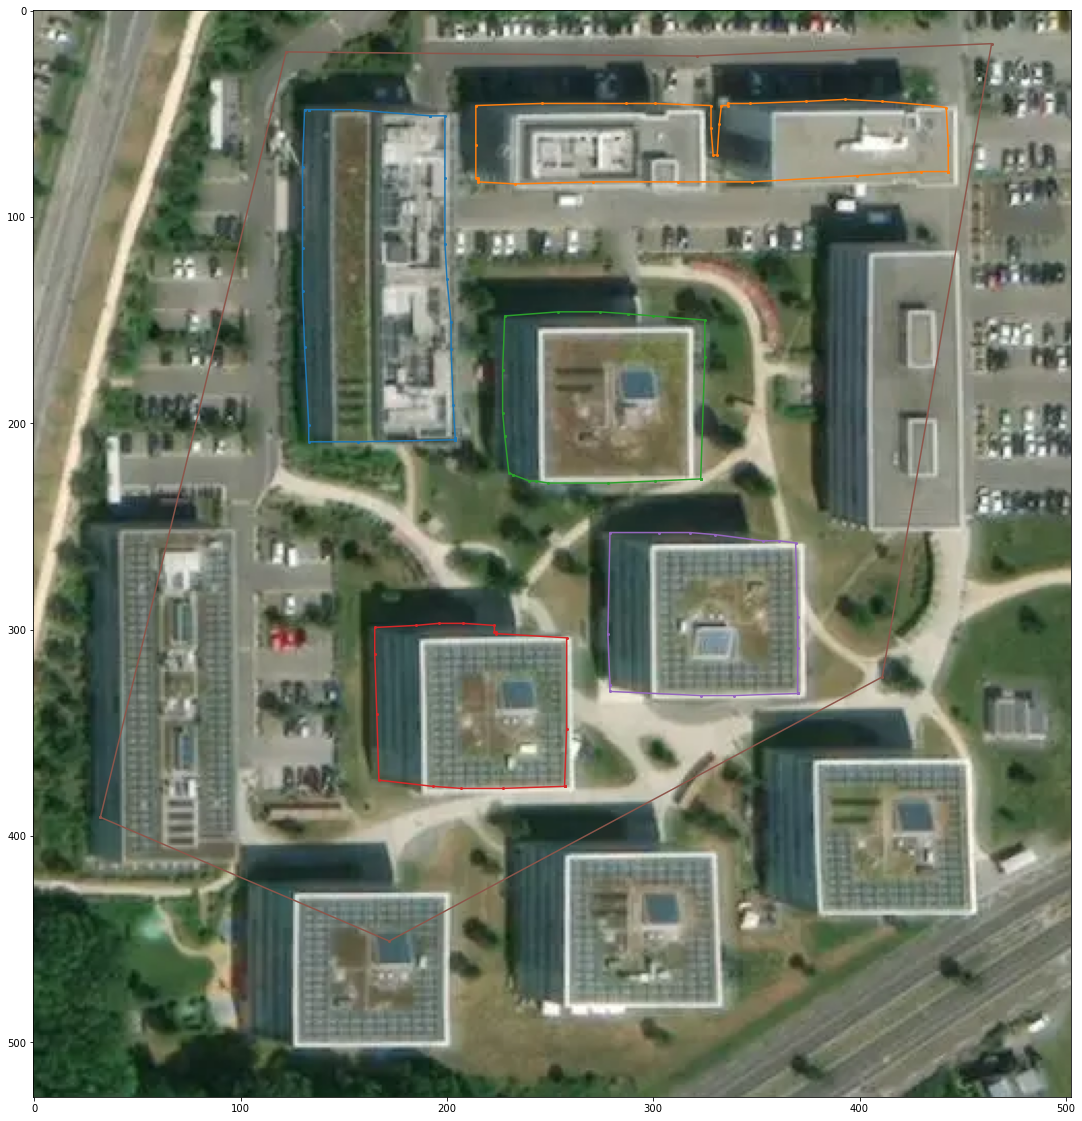

In [3]:
plt.figure(figsize=(20,20))
load_image = io.BytesIO(image)
im = np.load(load_image, allow_pickle=True)
plt.figure(figsize=(20,20))
plt.imshow(im);
for building in buildings:
    contour = np.array(building['xy'])
    if building['area'] > 0.0:
        plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2);
parcelle_coords_xy = np.array(parcelle_coords_xy)
plt.plot(*(parcelle_coords_xy[:,0], parcelle_coords_xy[:,1]), '-o', markersize=2);

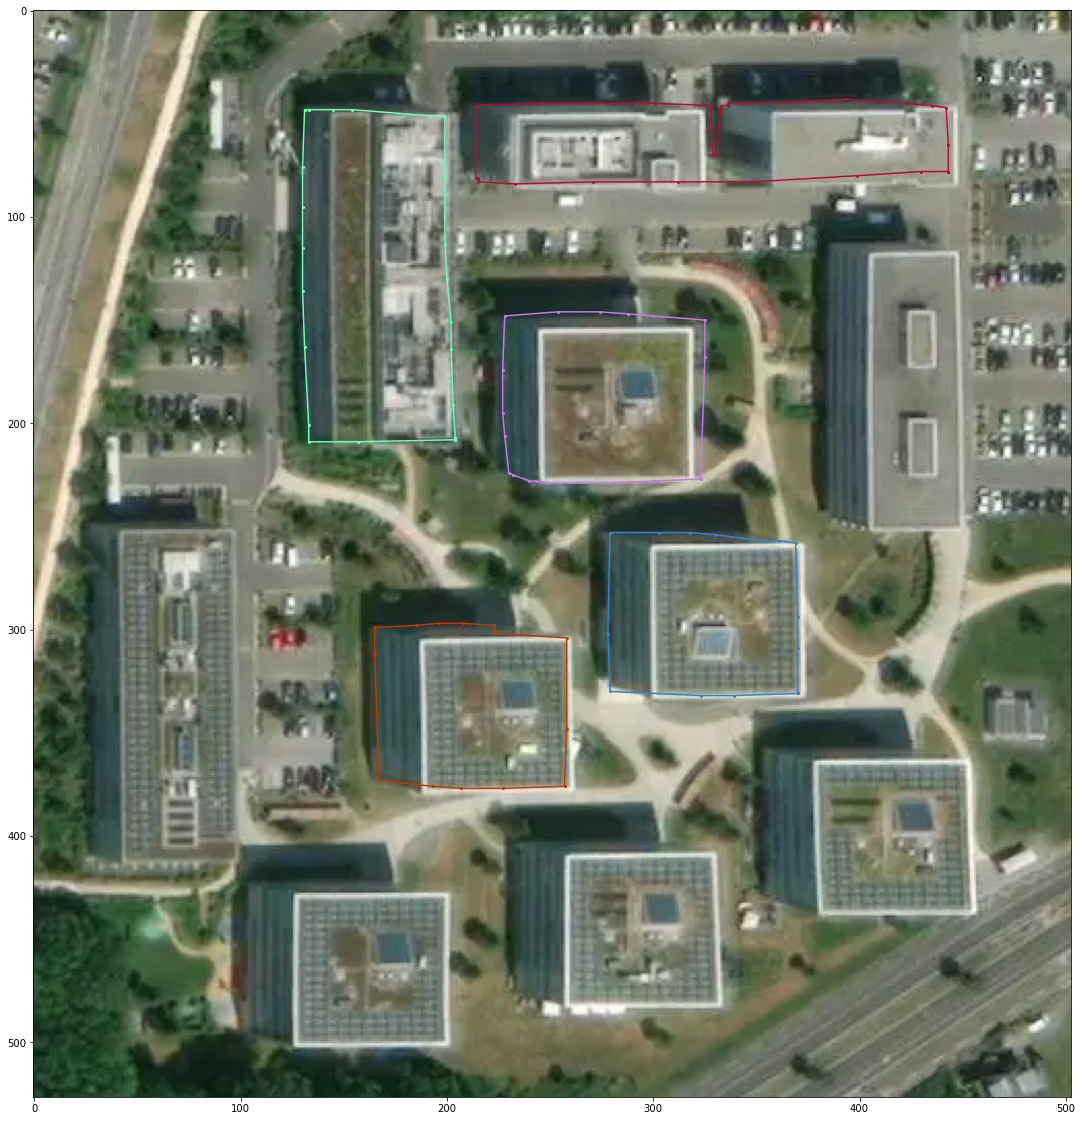

In [4]:
colors = np.random.rand(nb_comp, 3)
plt.figure(figsize=(20,20))
plt.imshow(im)
for building in buildings:
    contour = np.array(building['xy'])
    plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2, c=colors[building['comp'],:]);

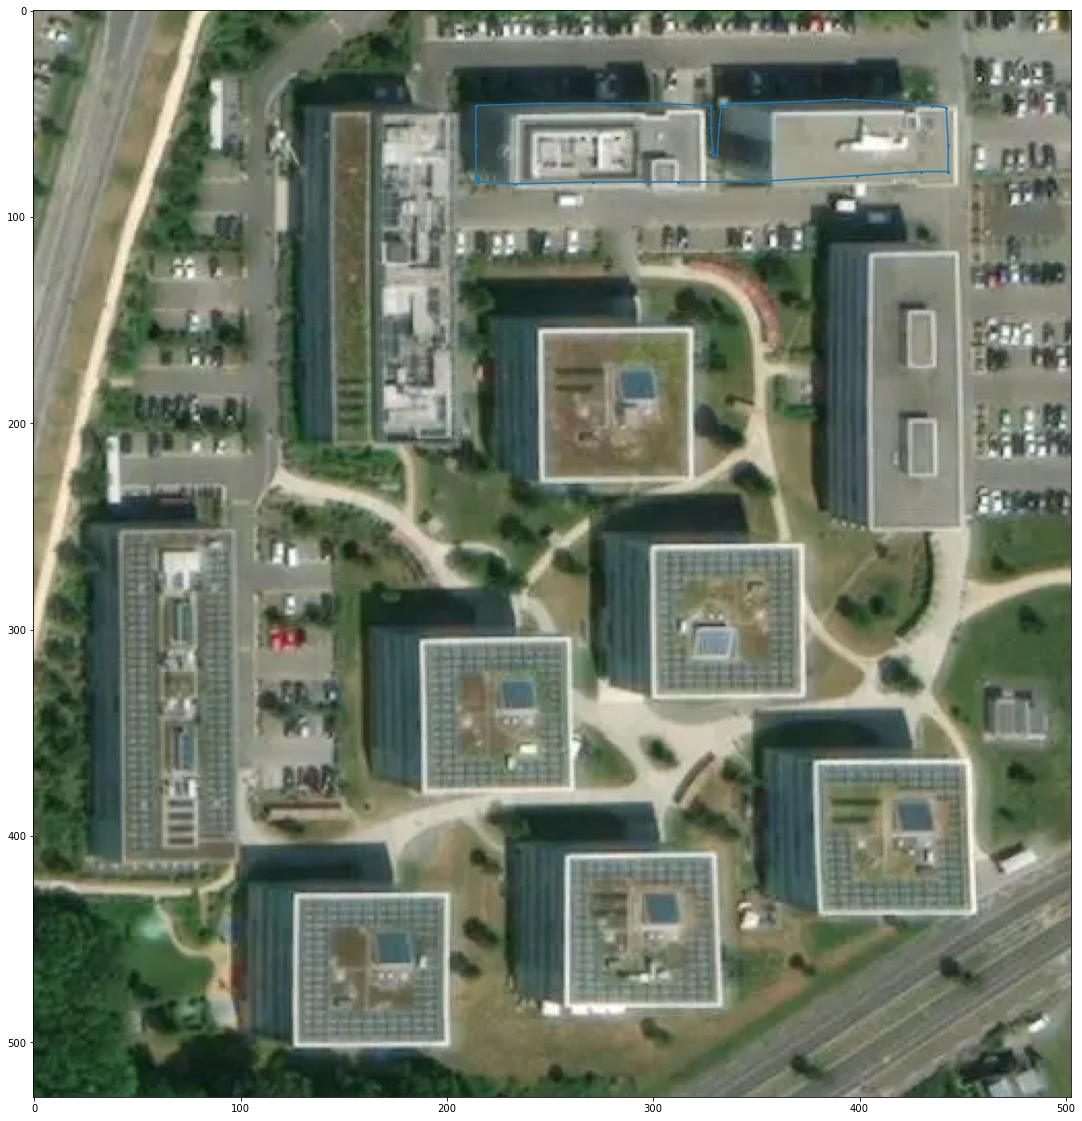

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(im)
contour = np.array(buildings[1]['xy'])
plt.plot(*(contour[:,0], contour[:,1]), '-o', markersize=2);

In [6]:
buildings[1]

{'xy': [(443, 78),
  (443, 65),
  (442, 47),
  (435, 46),
  (411, 44),
  (393, 43),
  (374, 44),
  (347, 45),
  (336, 45),
  (336, 46),
  (333, 46),
  (332, 55),
  (331, 70),
  (329, 70),
  (328, 57),
  (328, 46),
  (301, 45),
  (287, 45),
  (246, 45),
  (214, 46),
  (214, 65),
  (214, 81),
  (215, 81),
  (215, 82),
  (215, 82),
  (215, 83),
  (233, 84),
  (271, 83),
  (312, 83),
  (348, 83),
  (399, 80),
  (430, 78),
  (443, 78),
  (443, 78)],
 'lat_long': [(46.51772023722176, 6.562930941581726),
  (46.517768226031414, 6.562930941581726),
  (46.517834672075566, 6.562925577163696),
  (46.51783836352246, 6.562888026237488),
  (46.517845746416256, 6.562759280204773),
  (46.51784943786315, 6.562662720680237),
  (46.517845746416256, 6.562560796737671),
  (46.51784205496936, 6.562415957450867),
  (46.51784205496936, 6.562356948852539),
  (46.51783836352246, 6.562356948852539),
  (46.51783836352246, 6.56234085559845),
  (46.517805140500386, 6.56233549118042),
  (46.51774976879693, 6.56233012

In [7]:
dists

array([[ 0.        ,  6.1570525 ,  9.44081384, 36.40246331, 35.90150893],
       [ 6.1570525 ,  0.        , 25.44924718, 87.52661319, 69.78034083],
       [ 9.44081384, 25.44924718,  0.        , 29.47400454,  9.85134224],
       [36.40246331, 87.52661319, 29.47400454,  0.        ,  8.20940334],
       [35.90150893, 69.78034083,  9.85134224,  8.20940334,  0.        ]])